In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_free_tree = pd.read_csv('all_free_tree_day_180.csv', sep=' ', names=['day', 'my_date', 'user_id', 'event_type'])   # or: , parse_dates=['my_date'])

In [3]:
# Quick check for the dataframe and dtype
# all_free_tree.head()
# all_free_tree.info()

In [4]:
# Converting the column to datetime
all_free_tree['my_date'] = pd.to_datetime(all_free_tree['my_date']) 

In [5]:
# Sorting and resetting the index
all_free_tree.sort_values(by='my_date', axis=0, inplace=True)
all_free_tree.reset_index(drop=True, inplace=True)

In [6]:
# Selecting the first 30 days
all_free_tree_day30 = all_free_tree[all_free_tree['my_date'] < '2020-02-09']

In [7]:
# Quick check for the dataframe and dtype
# all_free_tree_day30.info()
# all_free_tree_day30.head()

In [8]:
# Getting every user first tree send
first_tree_send = all_free_tree_day30.groupby('user_id')['my_date'].min()
# Merging the 2 table
merged = pd.merge(all_free_tree_day30, first_tree_send, on='user_id', suffixes=('', '_first_send'))

In [9]:
# Quick check for the dataframe and dtype
# merged.head()
# merged.info()

In [10]:
# Calculating the days passed for every free tree sends for every user
merged['day_passed_from_given_user_first_send'] = merged['my_date']- merged['my_date_first_send']

In [11]:
# Converting back from datetime to string and float
# Else the sns.heatmap() will show the dates to nanoseconds
merged['day_passed_from_given_user_first_send'] = merged['day_passed_from_given_user_first_send'].astype('timedelta64[D]')
merged['my_date_first_send'] = np.datetime_as_string(merged['my_date_first_send'], unit='D')

In [12]:
# Cohort analysis
cohort = merged.groupby(['my_date_first_send', 'day_passed_from_given_user_first_send'])['user_id'].nunique()

In [13]:
# Solution 1

solution_1 = cohort.reset_index(level=(0,1))
solution_1.to_csv('week4friday', sep=';',index=False)

<AxesSubplot:xlabel='day_passed_from_given_user_first_send', ylabel='my_date_first_send'>

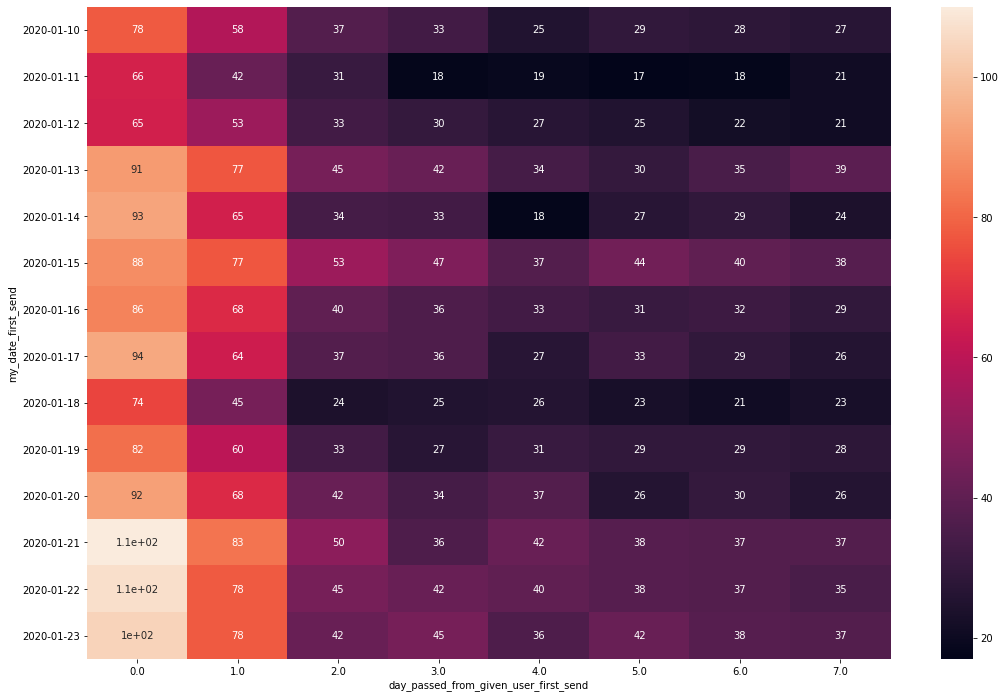

In [14]:
# Solution 2
solution_2 = cohort.unstack()

# Using the seaborn library heatmap func
plt.figure(figsize=(18,12))
sns.heatmap(solution_2.iloc[:14,:8], annot=True)